In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
#import math

In [3]:
winedata = pd.read_csv('wine.csv')
winedata.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
winedata.info()
winedata.isnull().any() 
winedata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

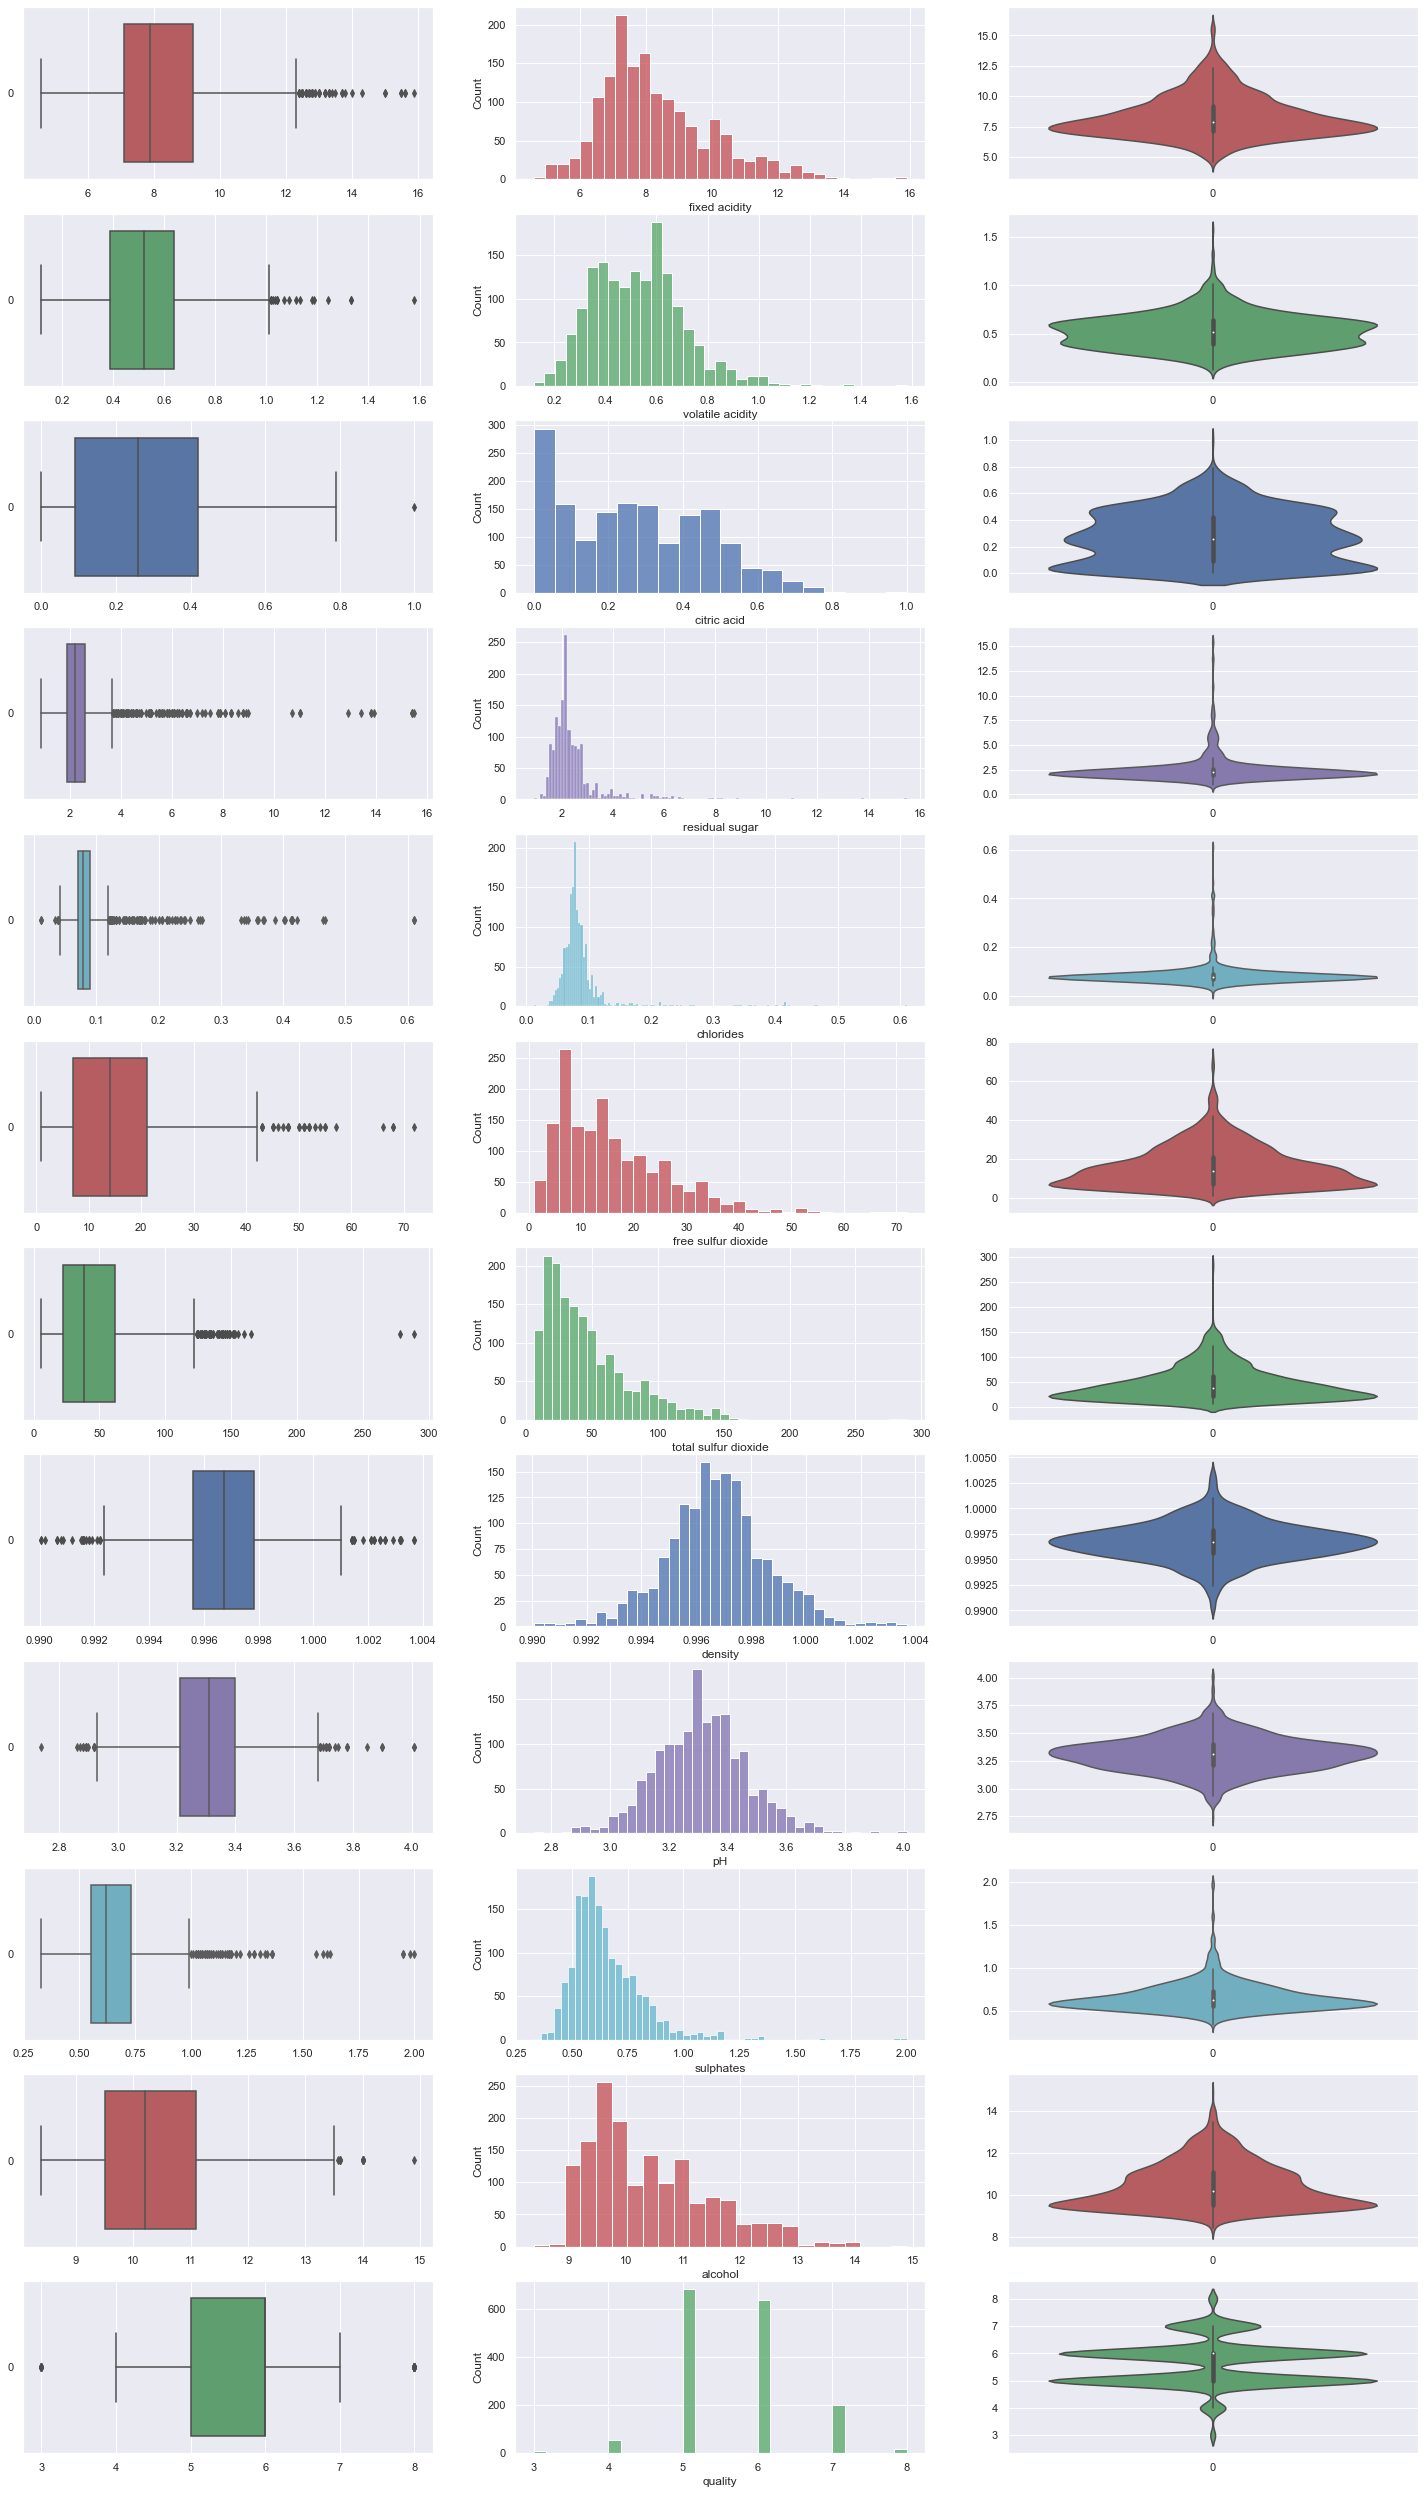

In [5]:
# Draw the distributions of all variables
f, axes = plt.subplots(12, 3, figsize=(25, 45))
colors = ["r", "g", "b", "m", "c", "r", "g", "b", "m", "c","r", "g"]

count = 0
for var in winedata:
    sb.boxplot(data=winedata[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=winedata[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data=winedata[var], color = colors[count], ax = axes[count,2])
    count += 1

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

<AxesSubplot:>

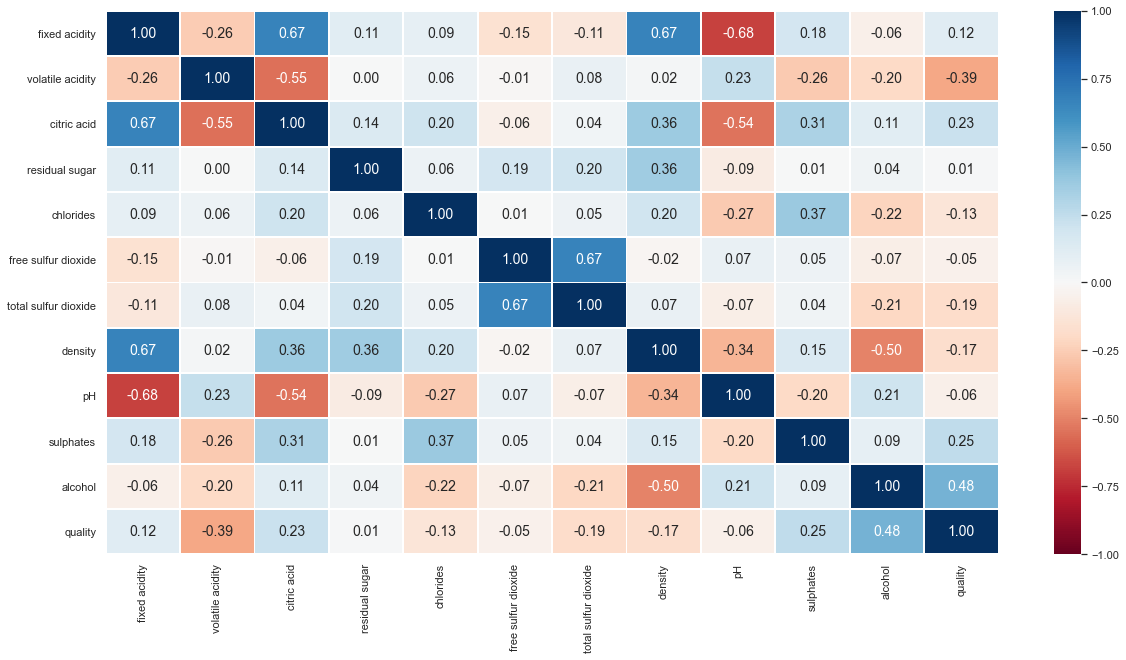

In [6]:
print(winedata.corr())

f, axes = plt.subplots(1, 1, figsize=(20, 10))
sb.heatmap(winedata.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

In [7]:
wineFA = pd.DataFrame(winedata['fixed acidity'])
wineVA = pd.DataFrame(winedata['volatile acidity'])
wineCA = pd.DataFrame(winedata['citric acid'])
wineRS = pd.DataFrame(winedata['residual sugar'])
wineC = pd.DataFrame(winedata['chlorides'])
wineFSD = pd.DataFrame(winedata['free sulfur dioxide'])
wineTSD = pd.DataFrame(winedata['total sulfur dioxide'])
wineD = pd.DataFrame(winedata['density'])
winepH = pd.DataFrame(winedata['pH'])
wineS = pd.DataFrame(winedata['sulphates'])
wineA = pd.DataFrame(winedata['alcohol'])
wineQ = pd.DataFrame(winedata['quality'])

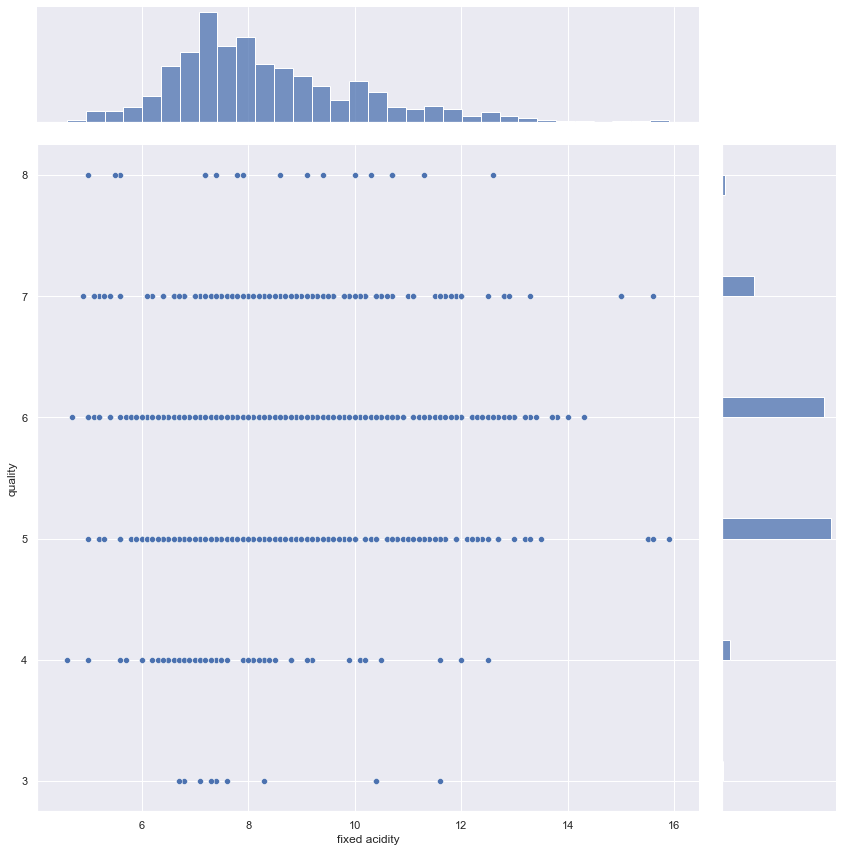

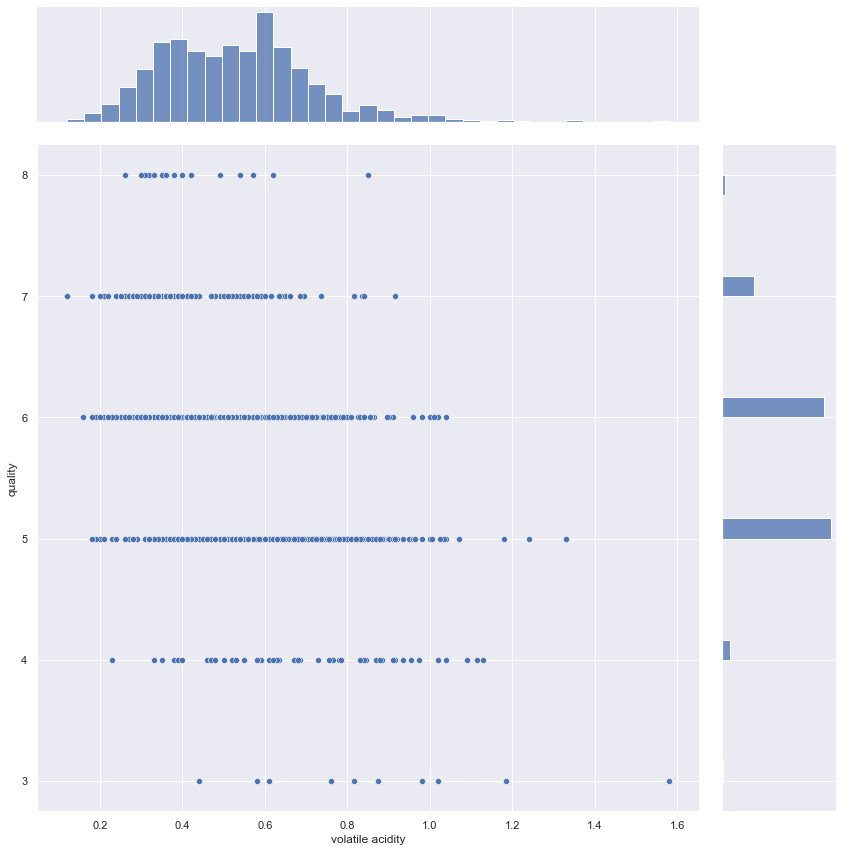

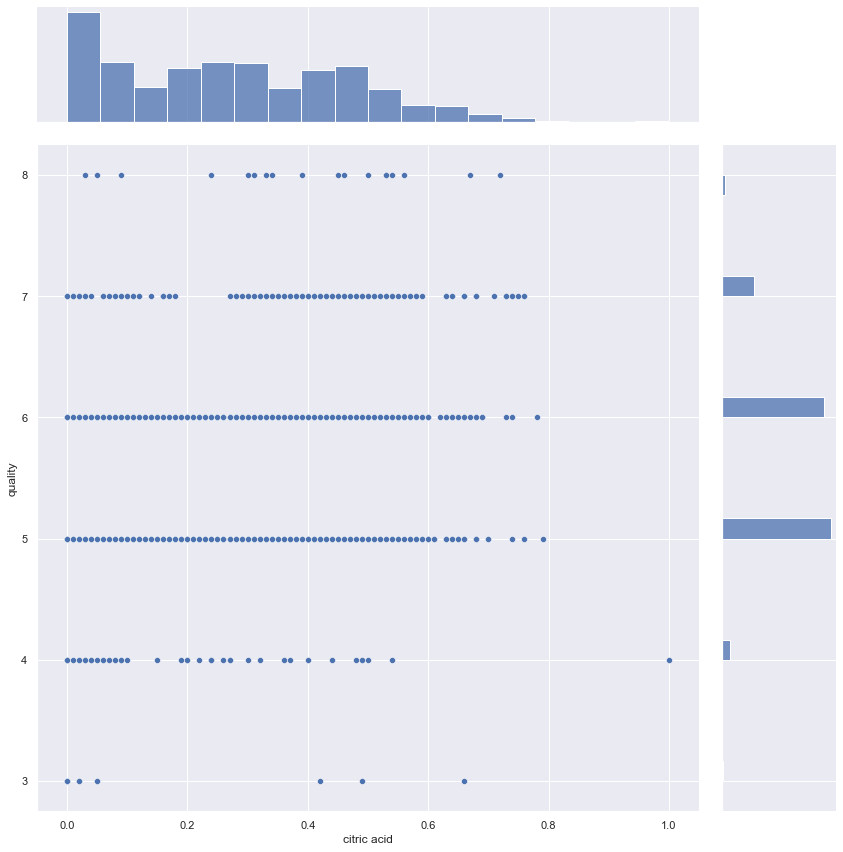

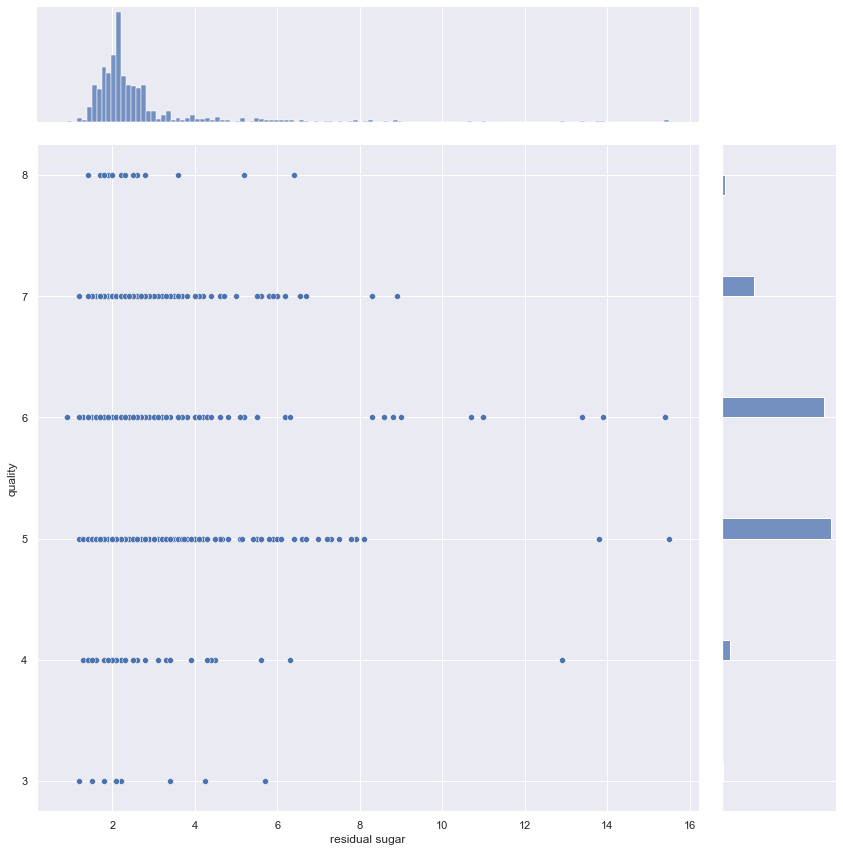

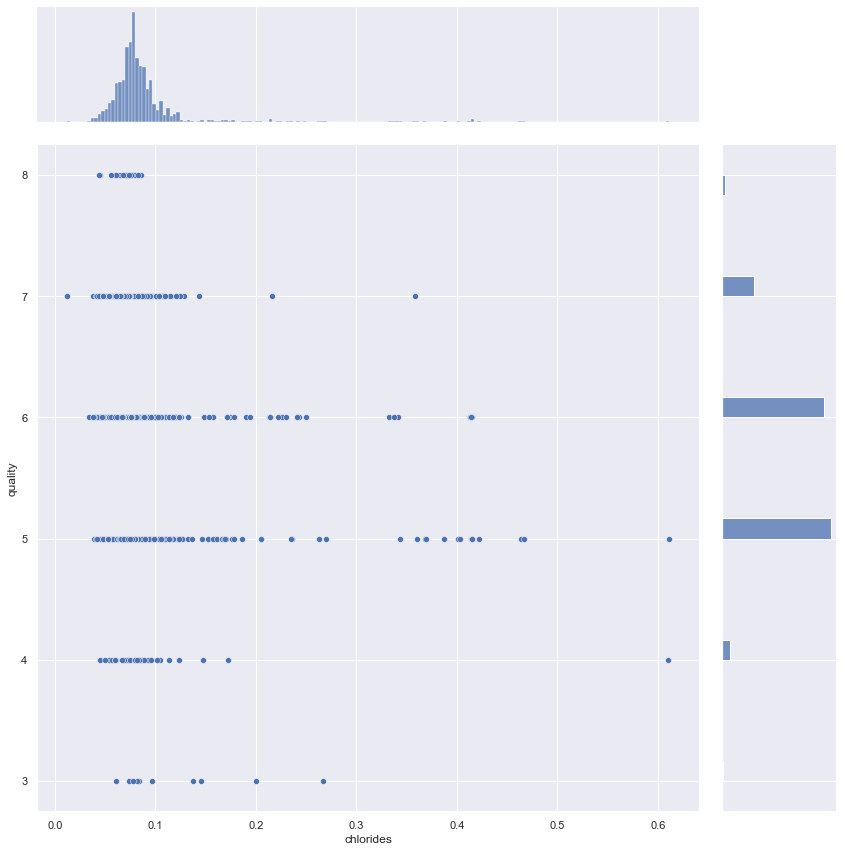

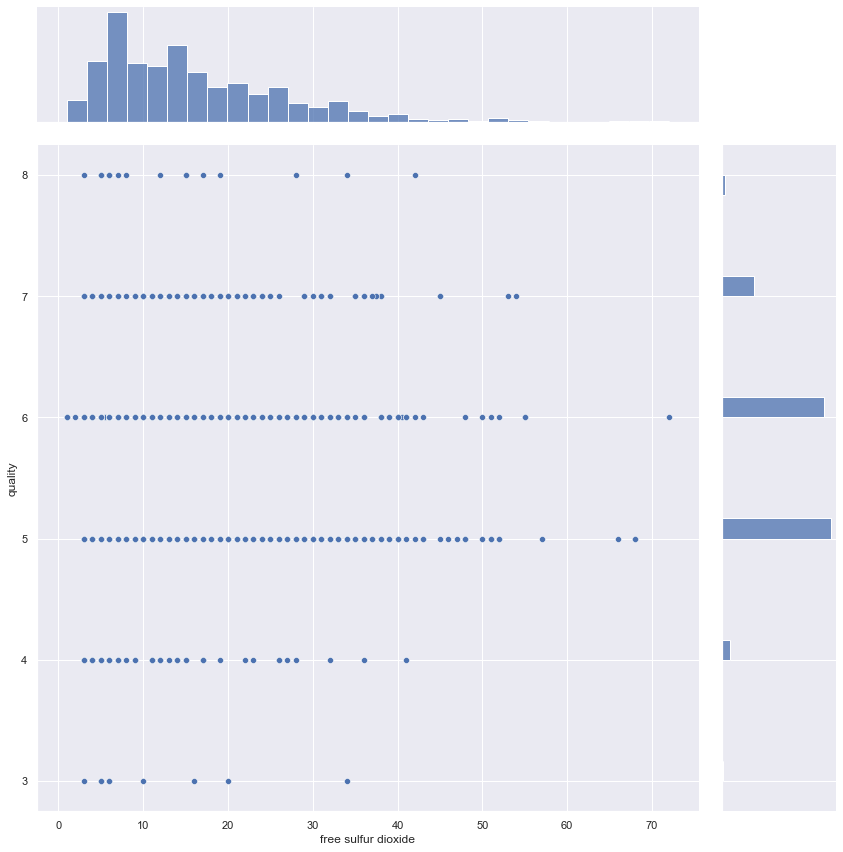

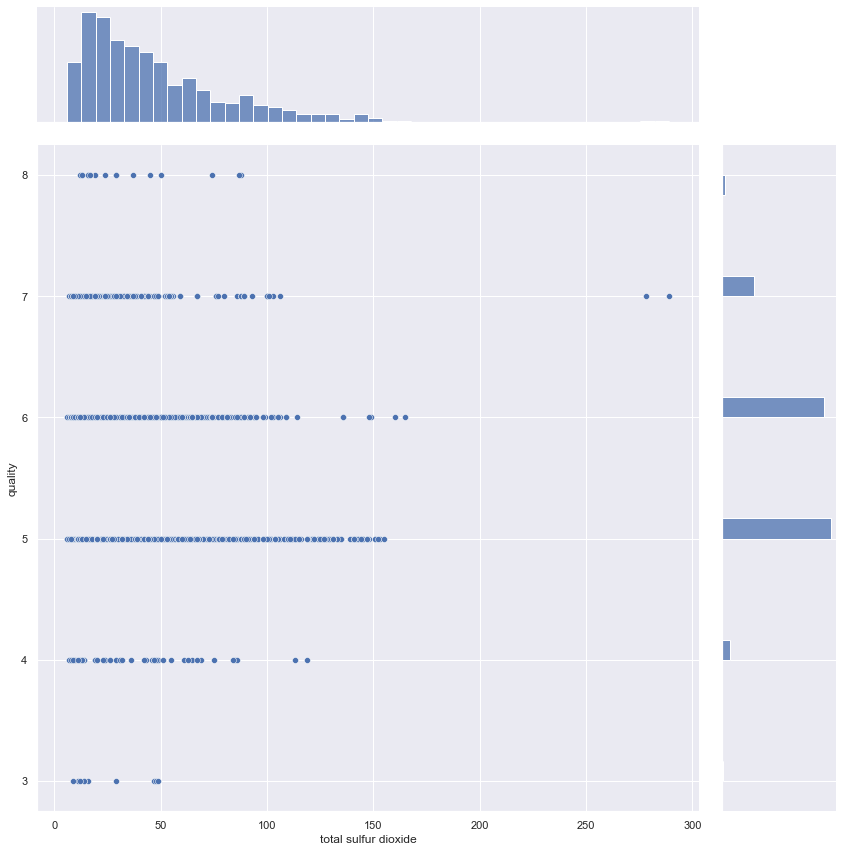

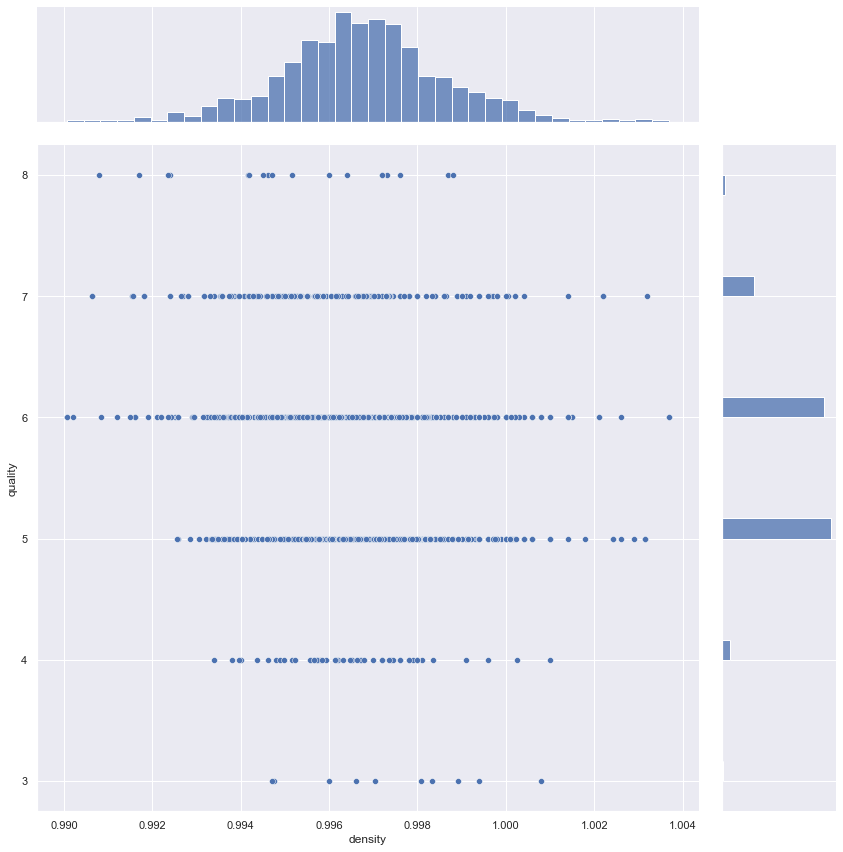

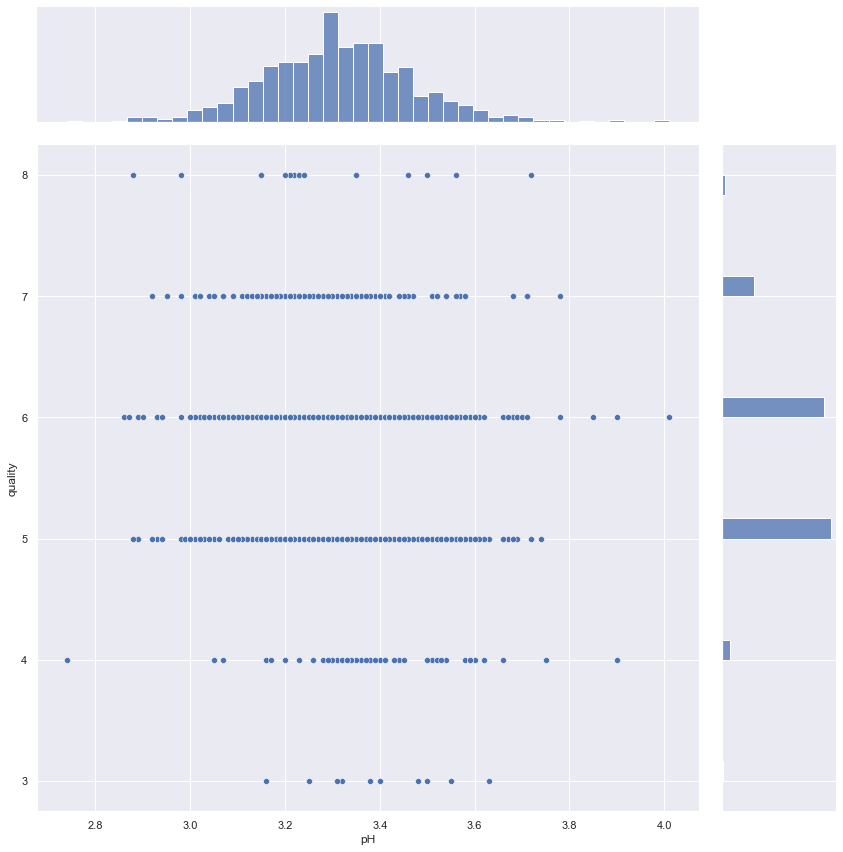

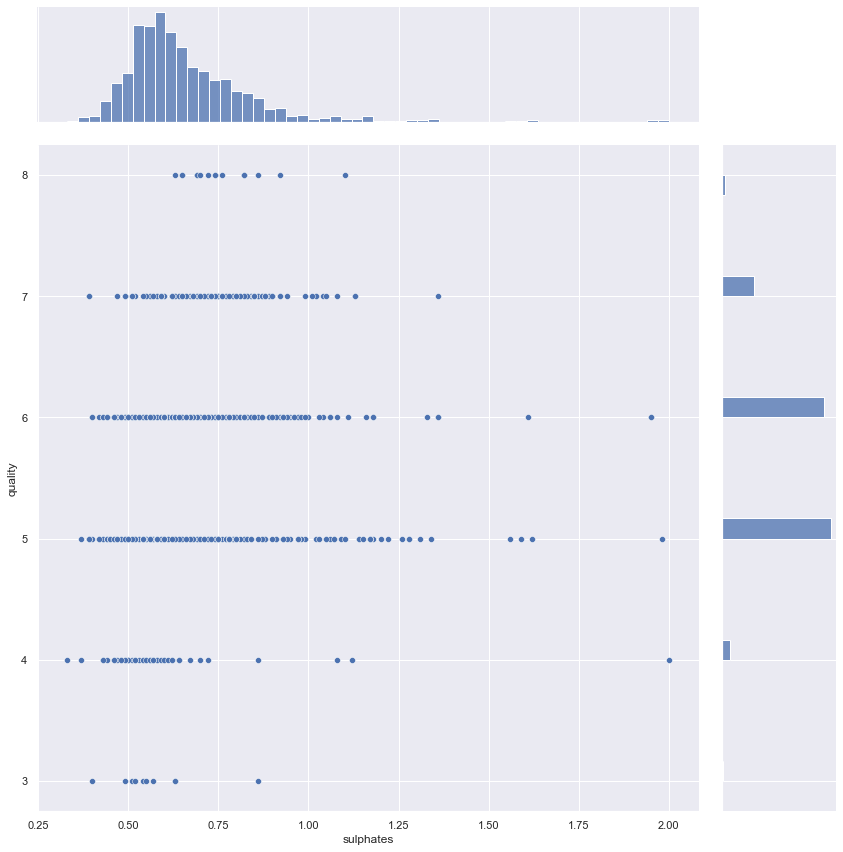

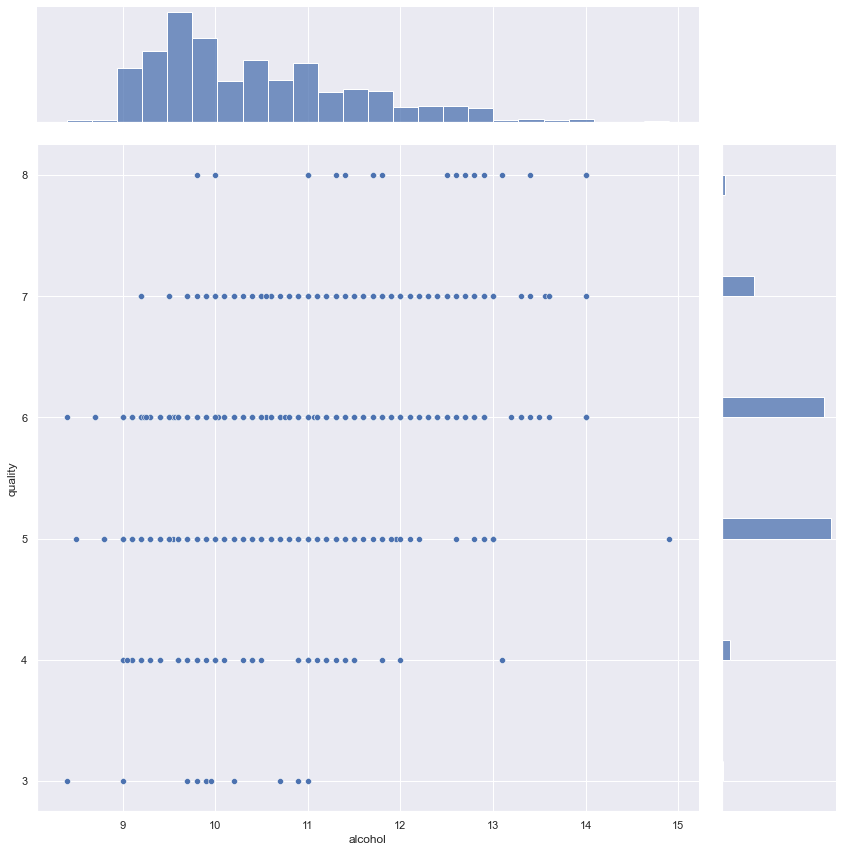

In [8]:
trainDF = pd.concat([wineFA, wineQ], axis = 1).reindex(wineFA.index)
sb.jointplot(data=trainDF, x='fixed acidity', y='quality', height = 12)

trainDF = pd.concat([wineVA, wineQ], axis = 1).reindex(wineVA.index)
sb.jointplot(data=trainDF, x='volatile acidity', y='quality', height = 12)

trainDF = pd.concat([wineCA, wineQ], axis = 1).reindex(wineCA.index)
sb.jointplot(data=trainDF, x='citric acid', y='quality', height = 12)

trainDF = pd.concat([wineRS, wineQ], axis = 1).reindex(wineRS.index)
sb.jointplot(data=trainDF, x='residual sugar', y='quality', height = 12)

trainDF = pd.concat([wineC, wineQ], axis = 1).reindex(wineC.index)
sb.jointplot(data=trainDF, x='chlorides', y='quality', height = 12)

trainDF = pd.concat([wineFSD, wineQ], axis = 1).reindex(wineFSD.index)
sb.jointplot(data=trainDF, x='free sulfur dioxide', y='quality', height = 12)

trainDF = pd.concat([wineTSD, wineQ], axis = 1).reindex(wineTSD.index)
sb.jointplot(data=trainDF, x='total sulfur dioxide', y='quality', height = 12)

trainDF = pd.concat([wineD, wineQ], axis = 1).reindex(wineD.index)
sb.jointplot(data=trainDF, x='density', y='quality', height = 12)

trainDF = pd.concat([winepH, wineQ], axis = 1).reindex(winepH.index)
sb.jointplot(data=trainDF, x='pH', y='quality', height = 12)

trainDF = pd.concat([wineS, wineQ], axis = 1).reindex(wineS.index)
sb.jointplot(data=trainDF, x='sulphates', y='quality', height = 12)

trainDF = pd.concat([wineA, wineQ], axis = 1).reindex(wineA.index)
sb.jointplot(data=trainDF, x='alcohol', y='quality', height = 12)

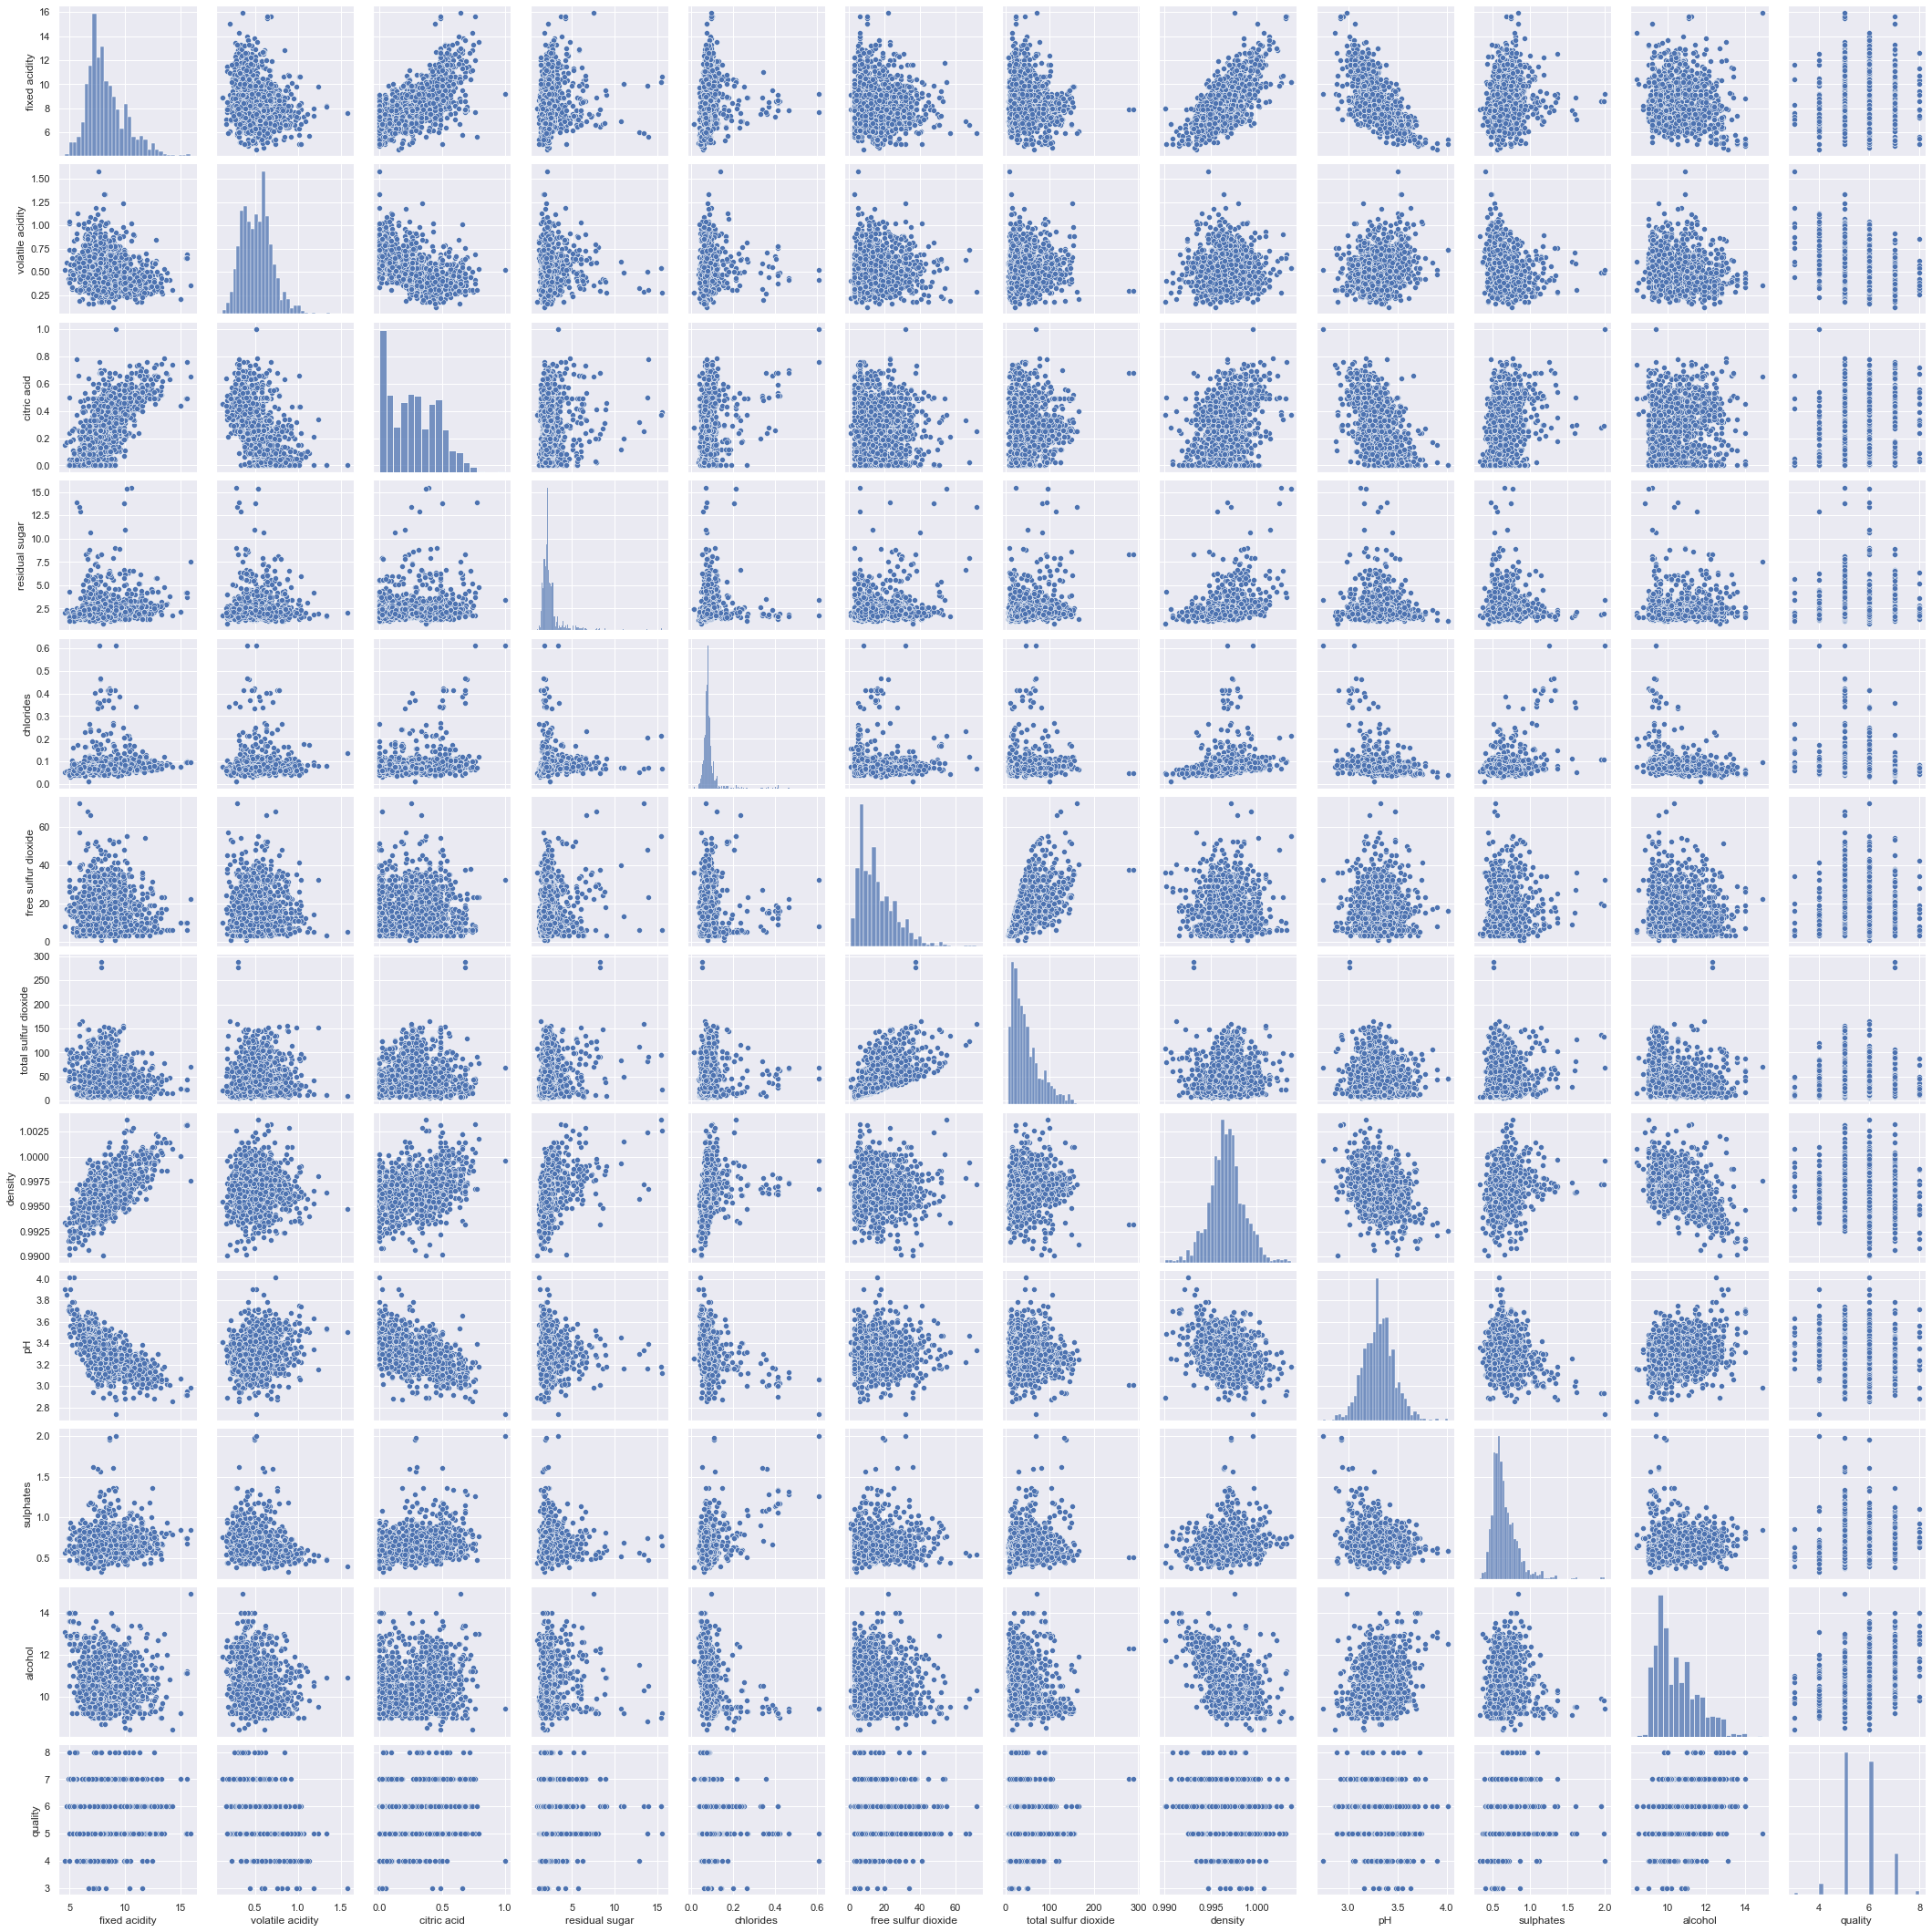

In [9]:
sb.pairplot(data = winedata)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()

In [11]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(max_depth = 2)

In [12]:
grade = [] #Declaring a new list
for i in winedata['quality']: 
    if i > 5.5:
        i = 1
        grade.append(i)
    else:
        i = 0
        grade.append(i)
winedata['grade'] = grade

In [13]:
winedata_train = pd.DataFrame(winedata[:1200])
winedata_test  = pd.DataFrame(winedata[-400:])

print("Train Set :", winedata_train.shape)
print("Test Set  :", winedata_test.shape)

Train Set : (1200, 13)
Test Set  : (400, 13)


In [14]:
winedata['grade'] = winedata['grade'].astype('category')
winedata.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
grade                   category
dtype: object

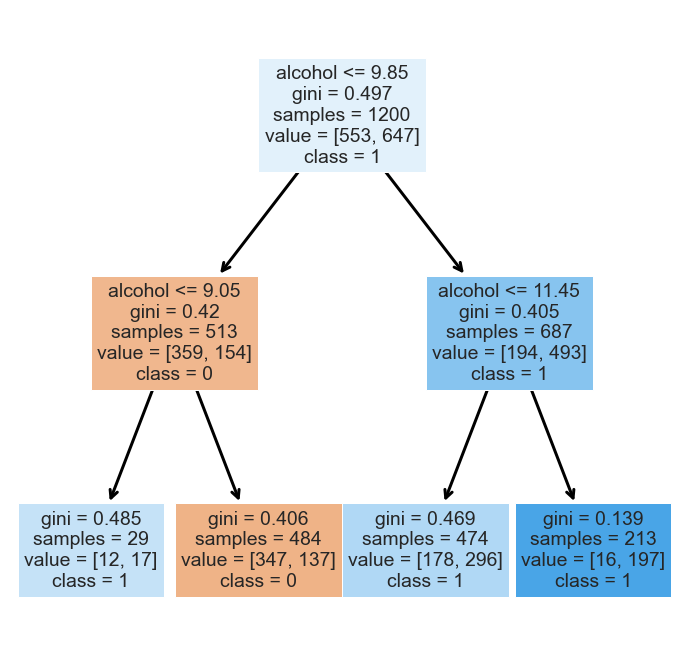

In [15]:
y_train = pd.DataFrame(winedata_train['grade'])
X_train = pd.DataFrame(winedata_train['alcohol'])

dectree.fit(X_train, y_train)

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.7141666666666666


<AxesSubplot:>

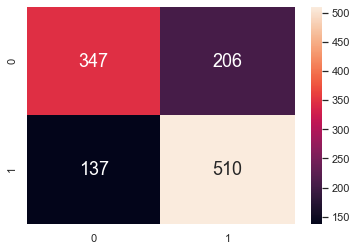

In [16]:
y_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.66


<AxesSubplot:>

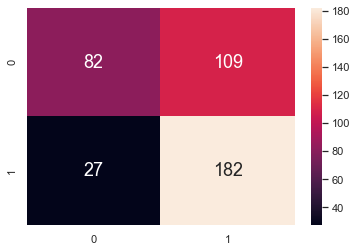

In [17]:
y_test = pd.DataFrame(winedata_test['grade'])
X_test = pd.DataFrame(winedata_test['alcohol'])

y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

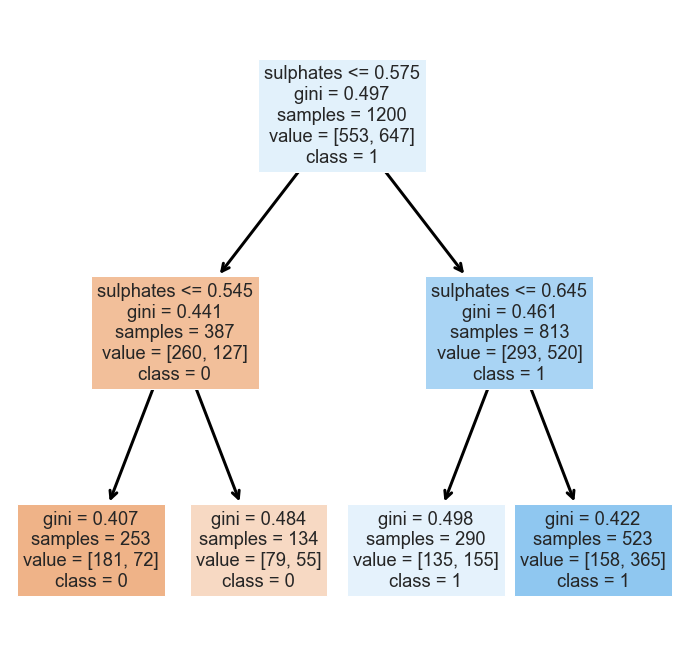

In [18]:
y_train = pd.DataFrame(winedata_train['grade'])
X_train = pd.DataFrame(winedata_train['sulphates'])

dectree.fit(X_train, y_train)

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.65


<AxesSubplot:>

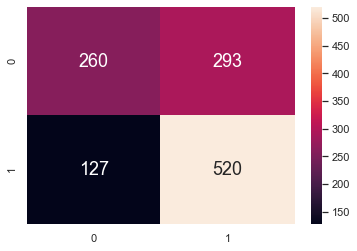

In [19]:
y_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.6675


<AxesSubplot:>

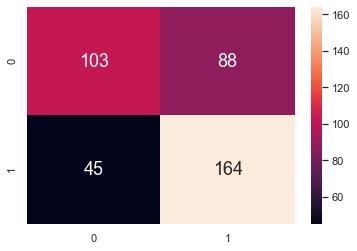

In [20]:
y_test = pd.DataFrame(winedata_test['grade'])
X_test = pd.DataFrame(winedata_test['sulphates'])

y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

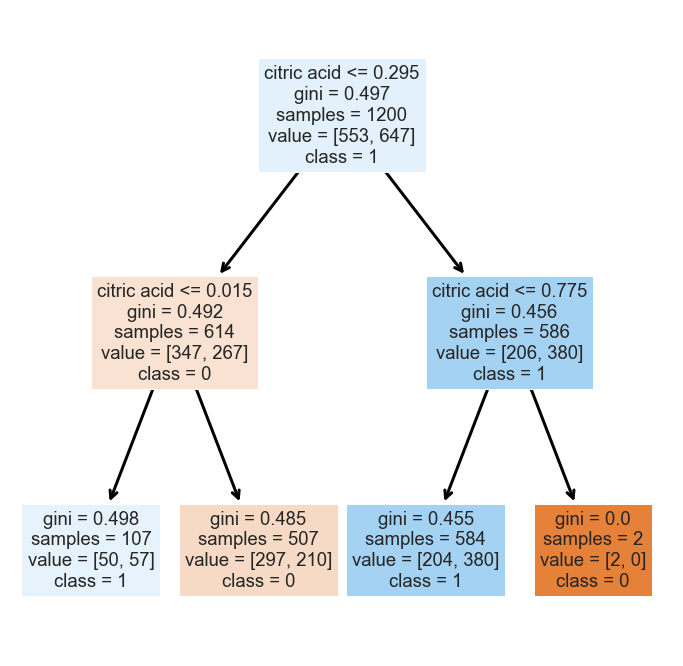

In [21]:
y_train = pd.DataFrame(winedata_train['grade'])
X_train = pd.DataFrame(winedata_train['citric acid'])

dectree.fit(X_train, y_train)

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.6133333333333333


<AxesSubplot:>

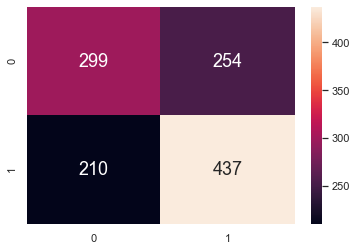

In [22]:
y_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.5575


<AxesSubplot:>

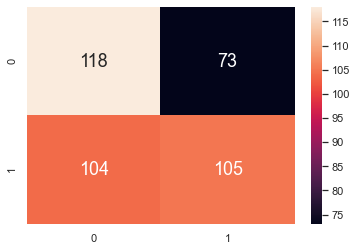

In [23]:
y_test = pd.DataFrame(winedata_test['grade'])
X_test = pd.DataFrame(winedata_test['citric acid'])

y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}) 

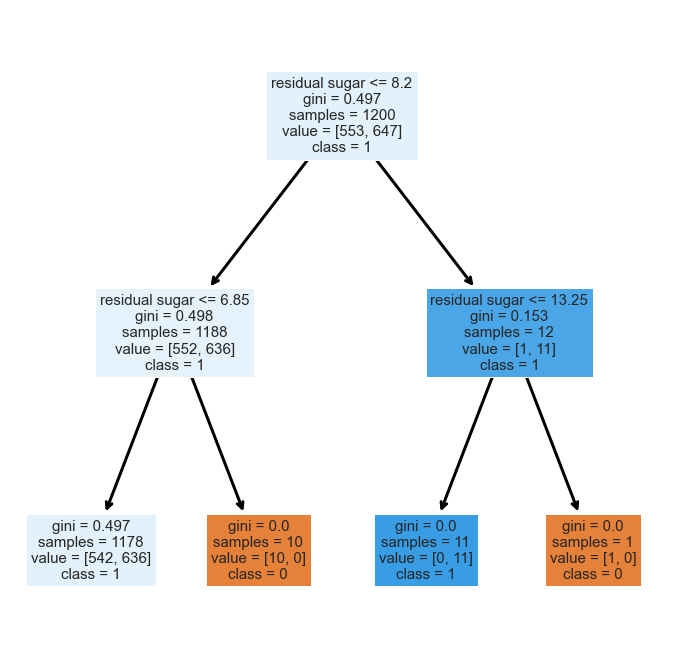

In [24]:
y_train = pd.DataFrame(winedata_train['grade'])
X_train = pd.DataFrame(winedata_train['residual sugar'])

dectree.fit(X_train, y_train)

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.5483333333333333


<AxesSubplot:>

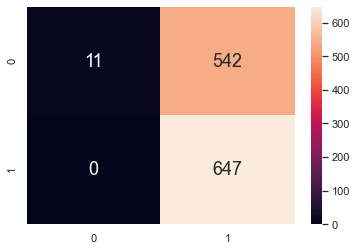

In [25]:
y_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.52


<AxesSubplot:>

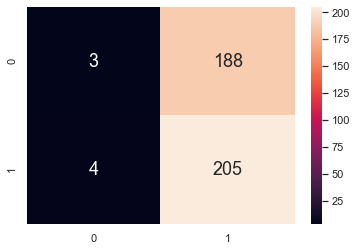

In [26]:
y_test = pd.DataFrame(winedata_test['grade'])
X_test = pd.DataFrame(winedata_test['residual sugar'])

y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}) 

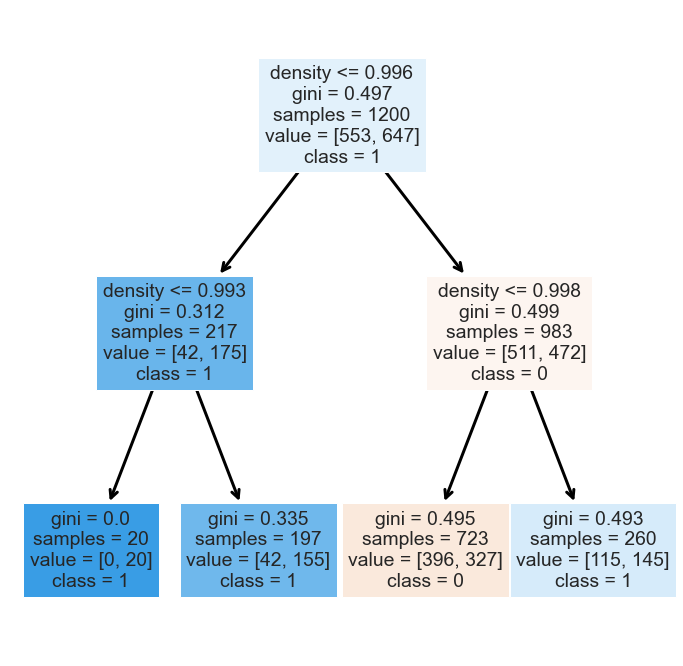

In [27]:
y_train = pd.DataFrame(winedata_train['grade'])
X_train = pd.DataFrame(winedata_train['density'])

dectree.fit(X_train, y_train)

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.5966666666666667


<AxesSubplot:>

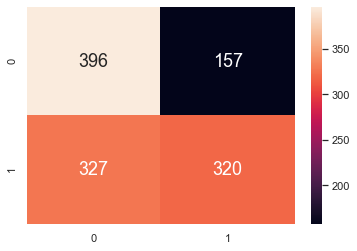

In [28]:
y_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.605


<AxesSubplot:>

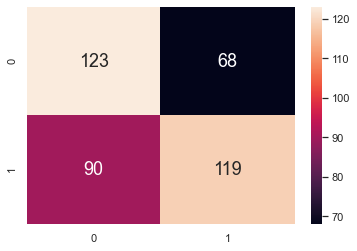

In [29]:
y_test = pd.DataFrame(winedata_test['grade'])
X_test = pd.DataFrame(winedata_test['density'])

y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}) 

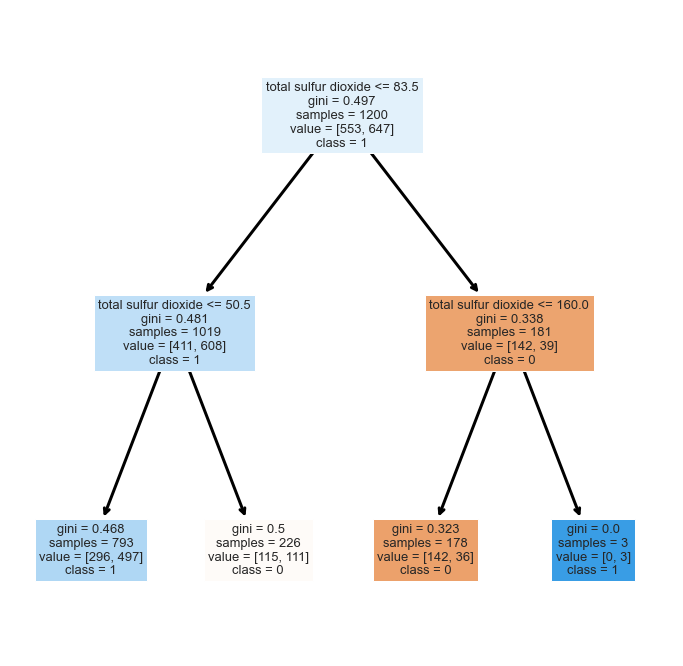

In [30]:
y_train = pd.DataFrame(winedata_train['grade'])
X_train = pd.DataFrame(winedata_train['total sulfur dioxide'])

dectree.fit(X_train, y_train)

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.6308333333333334


<AxesSubplot:>

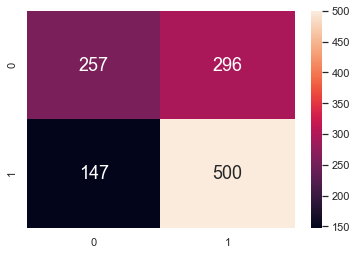

In [31]:
y_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.5575


<AxesSubplot:>

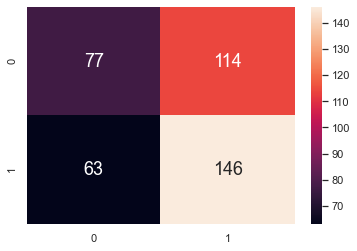

In [32]:
y_test = pd.DataFrame(winedata_test['grade'])
X_test = pd.DataFrame(winedata_test['total sulfur dioxide'])

y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}) 

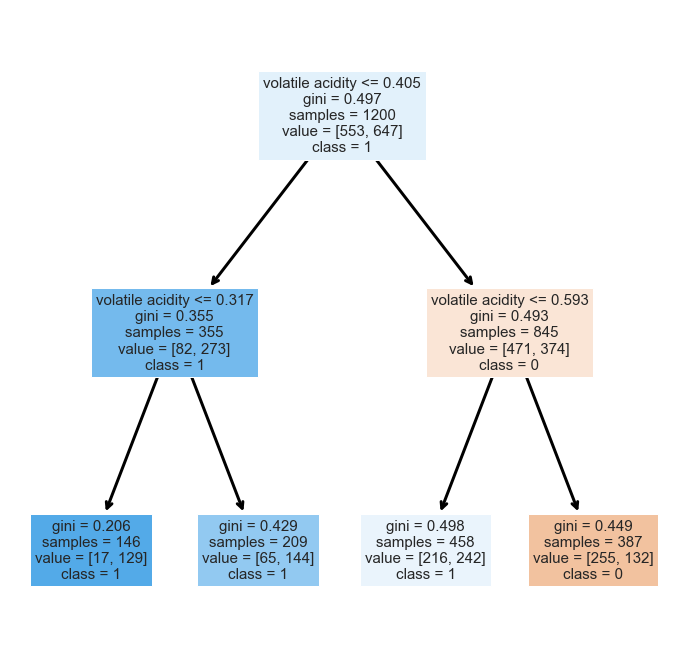

In [33]:
y_train = pd.DataFrame(winedata_train['grade'])
X_train = pd.DataFrame(winedata_train['volatile acidity'])

dectree.fit(X_train, y_train)

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.6416666666666667


<AxesSubplot:>

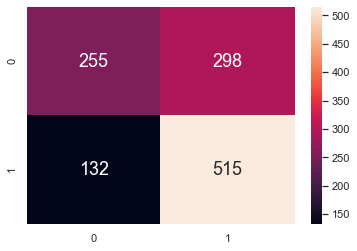

In [34]:
y_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.64


<AxesSubplot:>

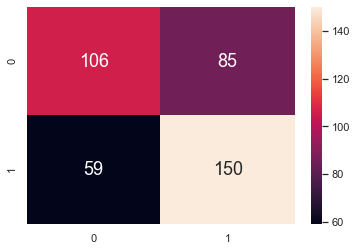

In [35]:
y_test = pd.DataFrame(winedata_test['grade'])
X_test = pd.DataFrame(winedata_test['volatile acidity'])

y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}) 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6055045871559633

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5675



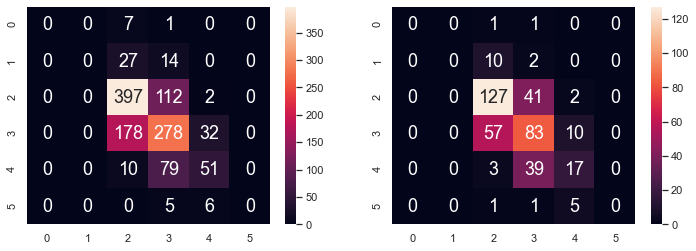

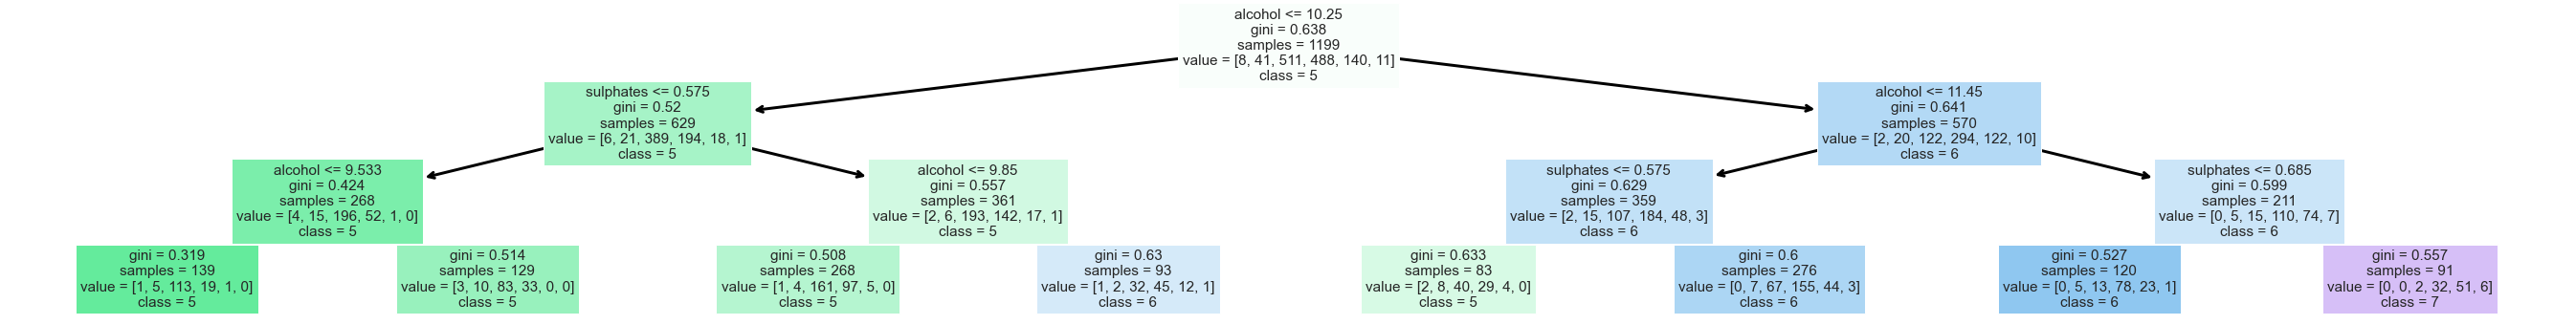

In [72]:
y = pd.DataFrame(winedata['quality'])
X = pd.DataFrame(winedata[['alcohol', 'sulphates', 'citric acid', ]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 400)

dectree = DecisionTreeClassifier(max_depth = 3)  
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(48, 6))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5646371976647206

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5175



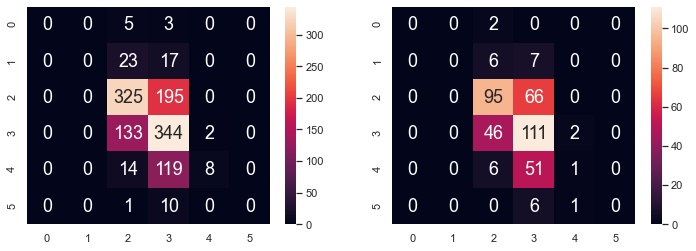

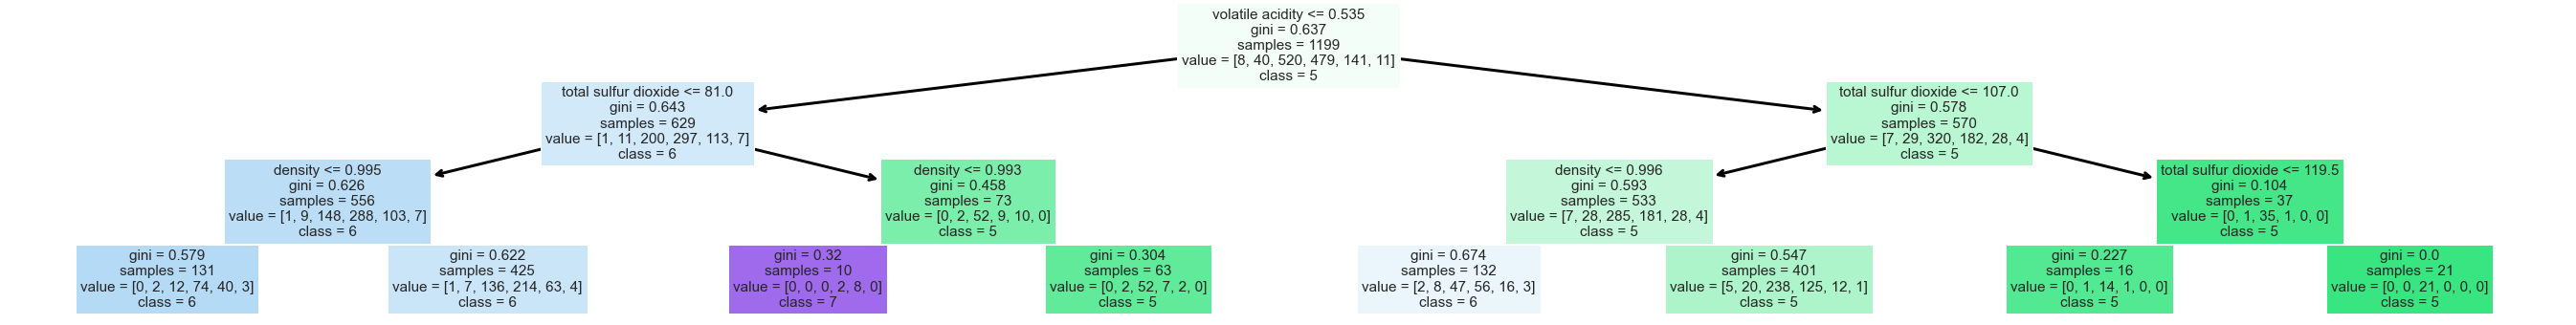

In [70]:
y = pd.DataFrame(winedata['quality'])
X = pd.DataFrame(winedata[['density', 'total sulfur dioxide', 'volatile acidity']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 400)

dectree = DecisionTreeClassifier(max_depth = 3)  
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(48, 6))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5954962468723937

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.545



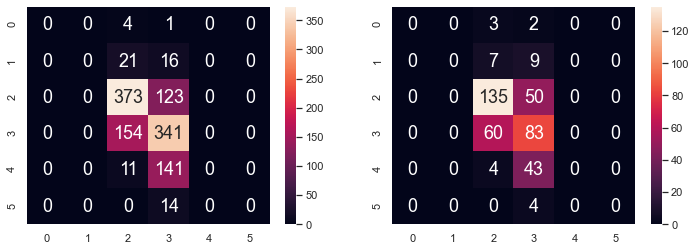

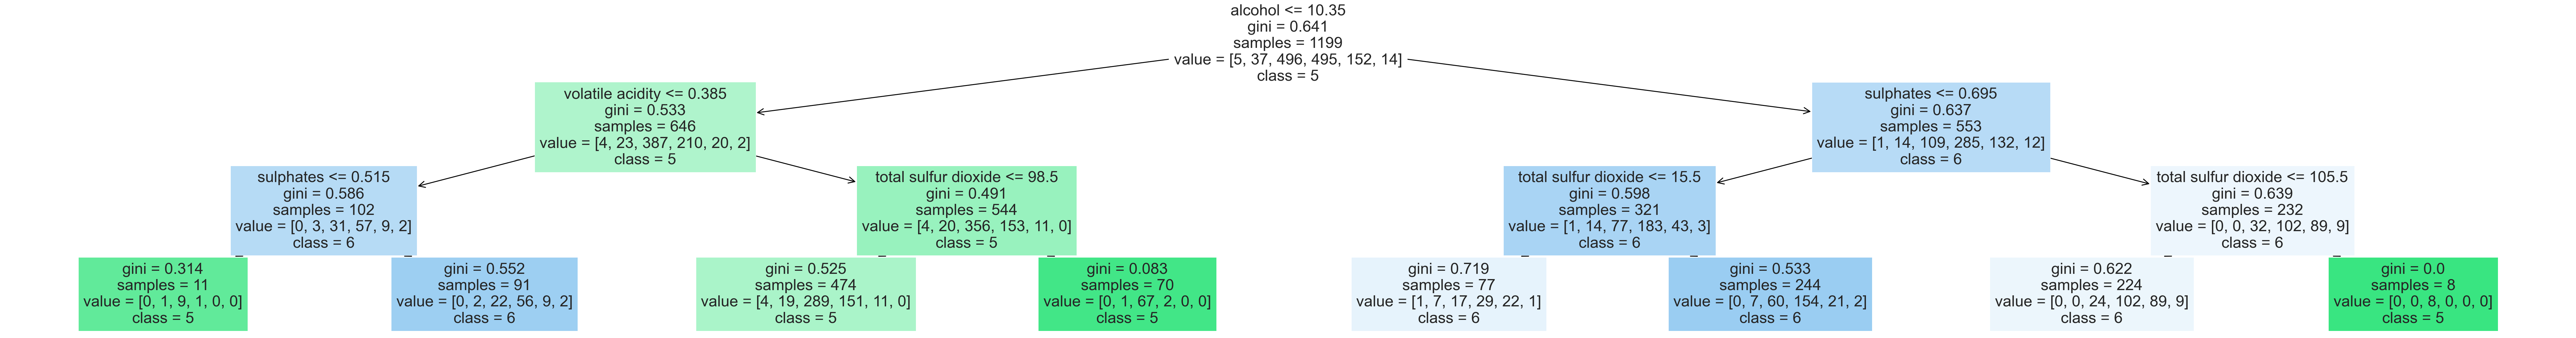

In [71]:
y = pd.DataFrame(winedata['quality'])
X = pd.DataFrame(winedata[['alcohol', 'sulphates', 'citric acid', 'residual sugar', 'density', 'total sulfur dioxide', 'volatile acidity']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 400)

dectree = DecisionTreeClassifier(max_depth = 3)  
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(150, 20))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

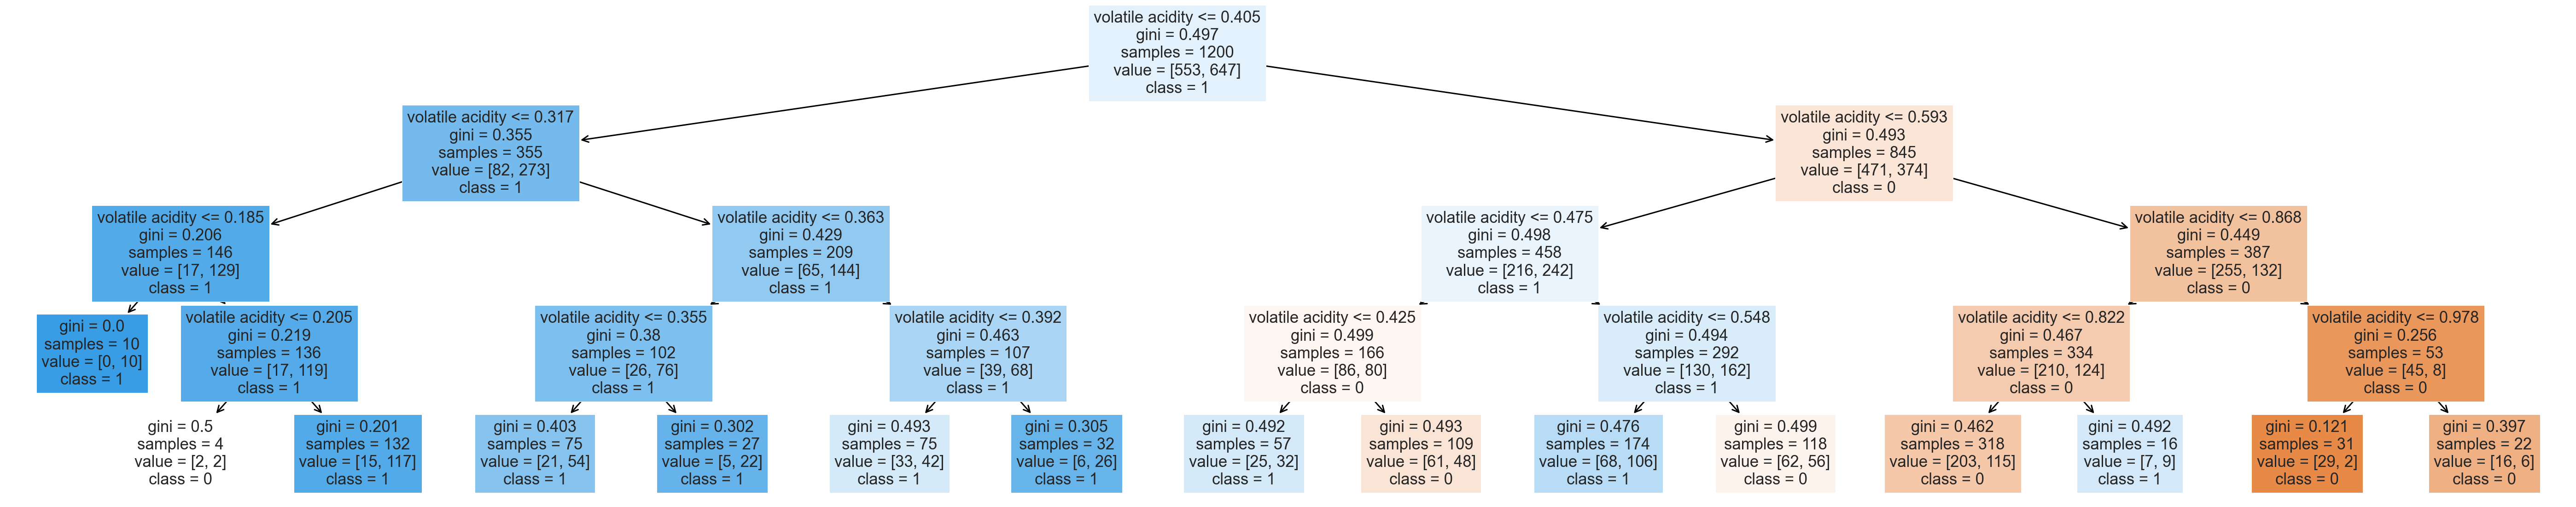

In [42]:
y_train = pd.DataFrame(winedata_train['grade'])
X_train = pd.DataFrame(winedata_train['volatile acidity'])

dectree.fit(X_train, y_train)

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(100, 20))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()